In [1]:
using Distributions, PyPlot

In [2]:
kl_div(p::Real, q::Real) = p <= 1e-10 ? 0. : p * log(p/q) - p + q
kl_div(ps, qs) = sum(kl_div(ps[ix], qs[ix]) for ix = 1:length(ps))


kl_div (generic function with 2 methods)

In [34]:
K = 5
d = 3
ps = rand(Dirichlet(d, 1), K)
Nmax = 30

30

In [41]:
function qss(qt, N)
    out = zeros(d)
    weight = 0.
    for k = 1:K
        w = exp(-N * kl_div(qt, ps[:, k]))
        out += ps[:, k] * w
        weight += w
    end
    out/weight
end
    
out = zeros(Nmax)
out2 = zeros(Nmax)
qhat = zeros(d)
for N = 1:Nmax
    qhat = (N-1)/N * qhat + 1/N * rand(Multinomial(1, ps[:, 1]))
#    println(qhat)
    out[N] = norm(qss(qhat, N) - ps[:, 1])
    out2[N] = norm(qhat - ps[:, 1])
end 


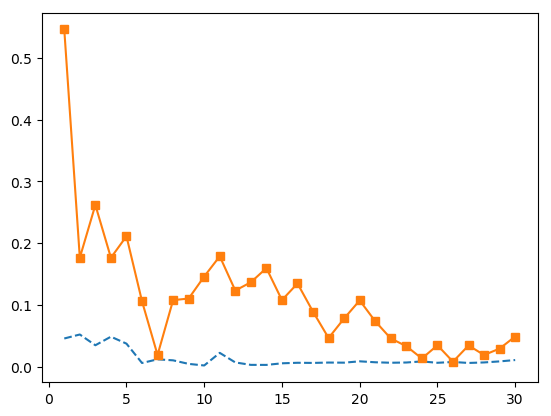

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13230e4d0>

In [42]:
plot(1:Nmax, log.(1 + out) , "--")
plot(1:Nmax, log.(1 + out2), "-s")